In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('StudentsPerformance.csv')

Quick glance of the data

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Visual Representation of Data

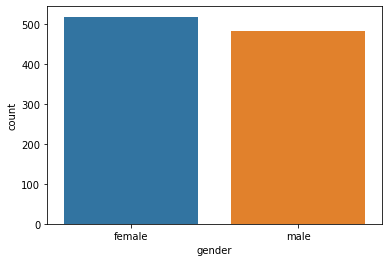

In [9]:
sns.countplot(x='gender',data=df)

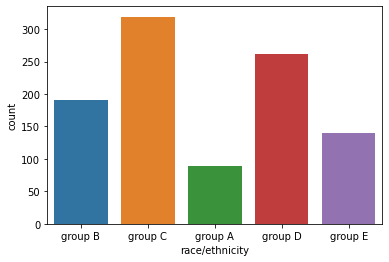

In [10]:
sns.countplot(x='race/ethnicity',data=df)

<ipython-input-11-dd4e147a04d6>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


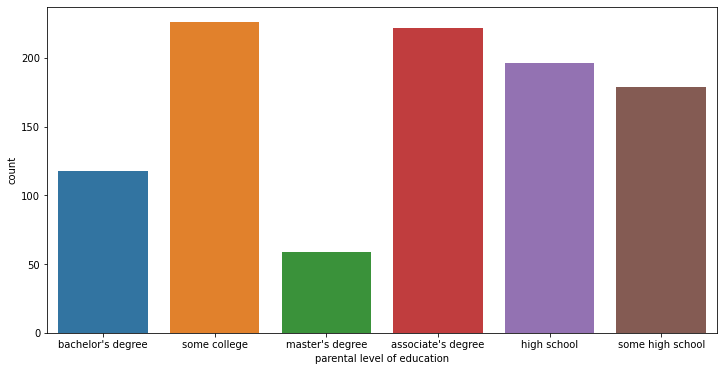

In [11]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education',data=df)
fig.show()

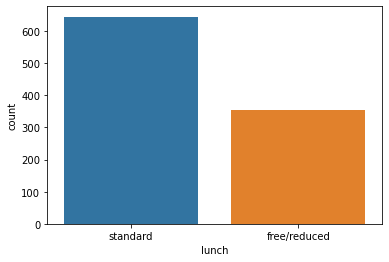

In [12]:
sns.countplot(x='lunch',data=df)

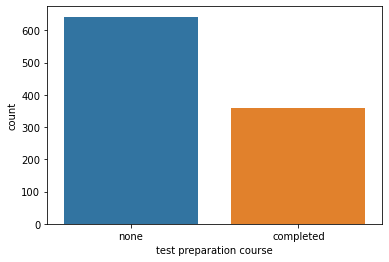

In [13]:
sns.countplot('test preparation course',data=df)

Distribution of target variables

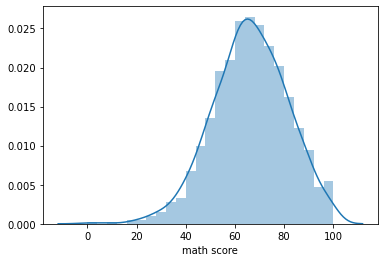

In [14]:
sns.distplot(df['math score'])

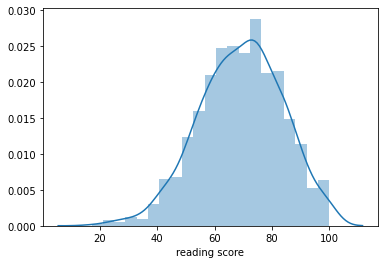

In [15]:
sns.distplot(df['reading score'])

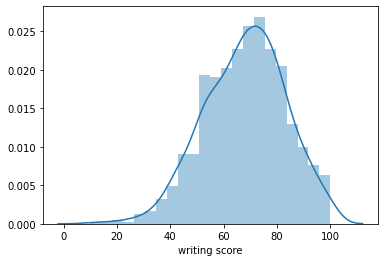

In [16]:
sns.distplot(df['writing score'])

Relation of target variables

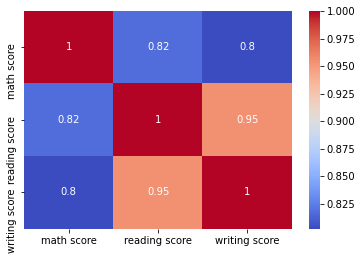

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [18]:
#Student performing good on one subject is expected to score good in the remaining too subjects

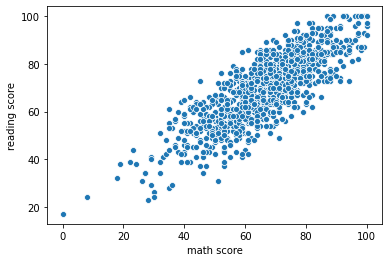

In [19]:
sns.scatterplot(x='math score',y='reading score',data=df)

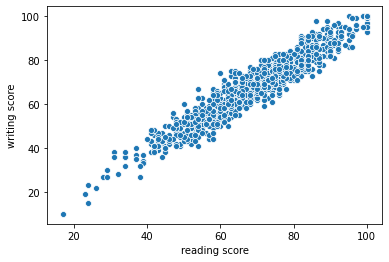

In [20]:
sns.scatterplot(x='reading score',y='writing score',data=df)

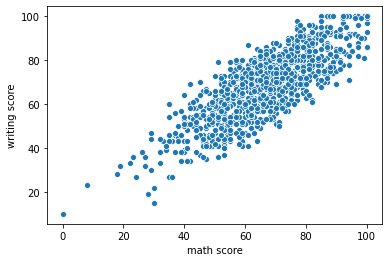

In [21]:
sns.scatterplot(x='math score',y='writing score',data=df)

In [22]:
#Per column analysis to be continued

Comparision of marks based on various factors

In [23]:
df.groupby(by='gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


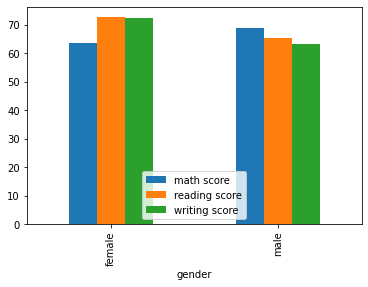

In [24]:
df.groupby(by='gender').mean().plot.bar()

Female students tend to score more marks in reading and writing while male students score more in maths.

In [25]:
df.groupby(by='race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


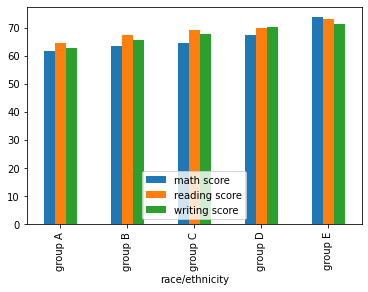

In [26]:
df.groupby(by=['race/ethnicity']).mean().plot.bar()

Students of race/ethnicity of group E tend to score more marks in all subjects than students of other groups.

In [27]:
df.groupby(by='parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


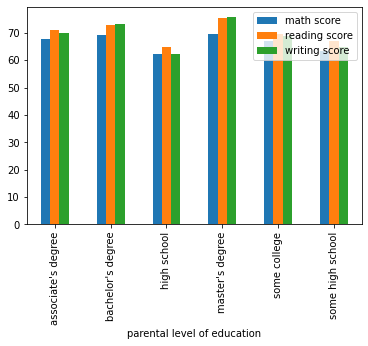

In [28]:
df.groupby(by=['parental level of education']).mean().plot.bar()

Students score tend to increase directly as per their parent's education. Parents having master's degree have a significant
impact on students to score more than those parents who only have a high school degree.

In [29]:
df.groupby(by='lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


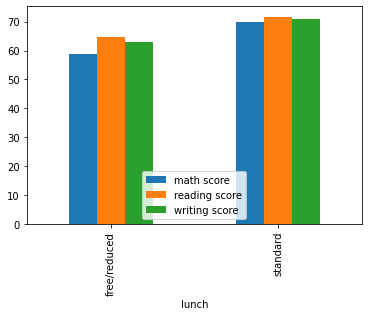

In [30]:
df.groupby(by=['lunch']).mean().plot.bar()

Students scoring more who pay standard fee for their lunch can be reasoned by the fact that they might be capable of having better study environment due to their financial status. This relates directly with the parental level of education as higher educations usually leads to higher salary and financial stability.

In [31]:
df.groupby(by=['test preparation course']).mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


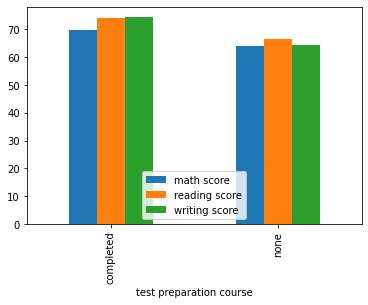

In [32]:
df.groupby(by=['test preparation course']).mean().plot.bar()

As expected, students completing test preparation course score more than students who do not.

In [33]:
#End of Explorary Data Analysis

Machine Learning using Random Forest

Importing libraries

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

Preparing data for Machine Learning

In [35]:
df1 = pd.get_dummies(data=df,drop_first=True)

In [36]:
df1.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


Separating and Splitting the data

In [37]:
X = df1.drop(['math score','reading score','writing score'],axis=1)
y_maths = df1['math score']
y_reading = df1['reading score']
y_writing = df1['writing score']

In [38]:
X_train, X_test, y_train_maths, y_test_maths = train_test_split(X, y_maths, test_size=0.33, random_state=42)
X_train, X_test, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.33, random_state=42)
X_train, X_test, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.33, random_state=42)

Creating model

In [39]:
rfr = RandomForestRegressor(min_samples_leaf=20)

Training the data

For maths

In [43]:
rfr.fit(X_train,y_train_maths)
pred_maths = rfr.predict(X_test)
print(mean_absolute_error(y_test_maths,pred_maths))

11.1991433841052


For reading

In [44]:
rfr.fit(X_train,y_train_reading)
pred_reading = rfr.predict(X_test)
print(mean_absolute_error(y_test_reading,pred_reading))

10.949988835973853


For writing

In [45]:
rfr.fit(X_train,y_train_writing)
pred_writing = rfr.predict(X_test)
print(mean_absolute_error(y_test_writing,pred_writing))

10.662669946226027


End of Machine Learning Section